# Education Analysis

Name: Edward Tan Yuan Chong


In [11]:
# Importing libraries
import matplotlib.pyplot as plt
import numpy as np

# Importing Datasets
plt.rc('font',family="Gill Sans MT")
expenditureData = np.genfromtxt("./GovernmentRecurrentExpenditureonEducationByTypeofEducationalInstitutions.csv",delimiter=",",dtype=[int,"U50",int], names = True)
pupilsPerTeacherPrimaryData = np.genfromtxt("./PupilsPerTeacherinPrimarySchools.csv",delimiter=",",dtype=[int,float],names=True)
pupilsPerTeacherSecondaryData = np.genfromtxt("./PupilsPerTeacherinSecondarySchools.csv",delimiter=",",dtype=[int,float],names=True)
enrolmentData = np.genfromtxt("./CombinedAndGrossEnrolmentRatioForPrimarySecondaryTertiaryEducation.csv",delimiter=',',dtype=[int,"U50","U50","U50",float],names=True)

In [12]:
# Dataset #1 : Expenditure dataset analysis
header = "Government recurrent expenditure on Education by type of educational institutions"
print(f"{header:*^89}")
print(f"There are {expenditureData.shape[0]} rows and {len(expenditureData[0])} columns in this dataset.\n\nThe names of the columns are:\n")
columns = expenditureData.dtype.names
for i in range(len(columns)):
    print(f"- {columns[i]} {type(expenditureData[0][i])} isNumeric: {str(expenditureData[0][i]).isnumeric()}")
print(" \n")
for i in columns:
    print(f"{len(np.unique(expenditureData[i]))} unique values in {i} column")

****Government recurrent expenditure on Education by type of educational institutions****
There are 287 rows and 3 columns in this dataset.

The names of the columns are:

- year <class 'numpy.int32'> isNumeric: True
- type_of_educational_institutions <class 'numpy.str_'> isNumeric: False
- recurrent_expenditure <class 'numpy.int32'> isNumeric: True
 

41 unique values in year column
7 unique values in type_of_educational_institutions column
287 unique values in recurrent_expenditure column


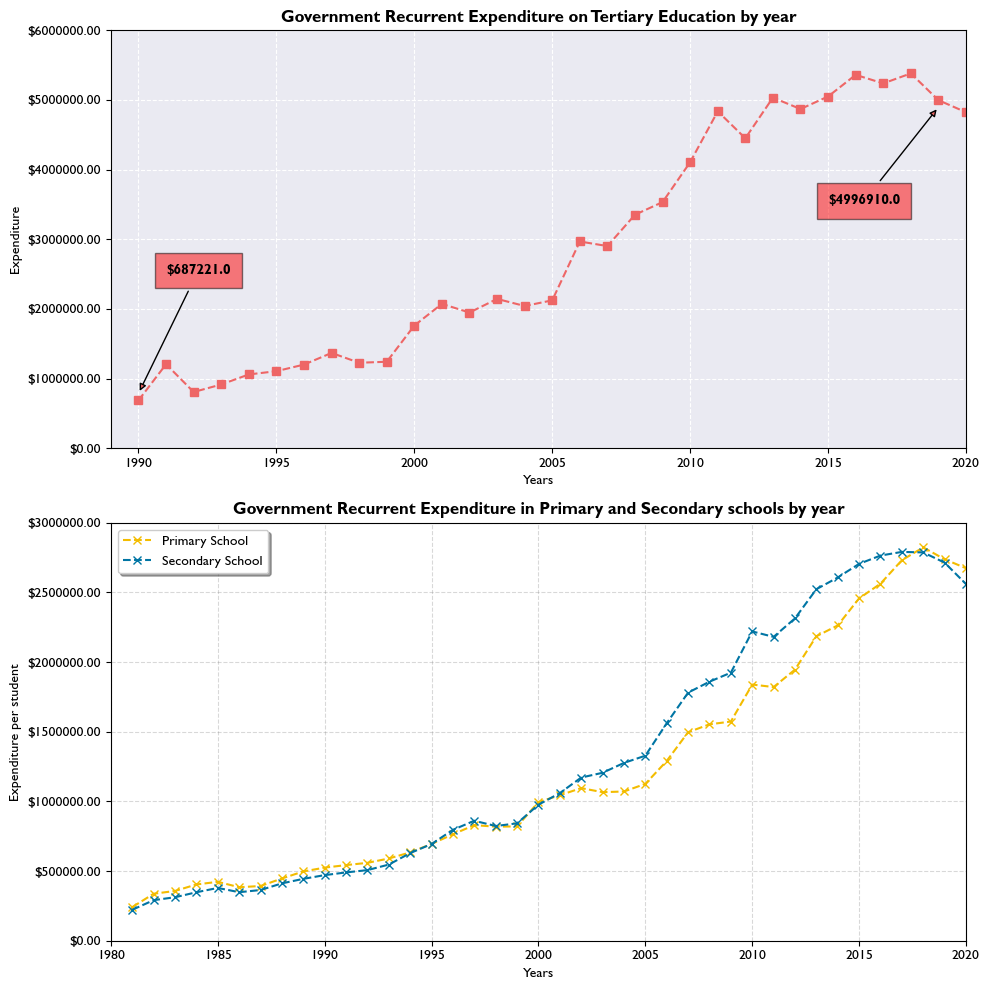

In [13]:
# Dataset 1 Code (Line chart)

# Extract data and sort based on education level
data_primary = expenditureData[np.isin(expenditureData['type_of_educational_institutions'],["Primary Schools"])]
data_secondary = expenditureData[np.isin(expenditureData['type_of_educational_institutions'],["Secondary Schools"])]
data_ite = expenditureData[np.isin(expenditureData['type_of_educational_institutions'],["Institute of Technical Education"])]
data_jc = expenditureData[np.isin(expenditureData['type_of_educational_institutions'],["Junior Colleges / Centralised Institute"])]
data_poly = expenditureData[np.isin(expenditureData['type_of_educational_institutions'],["Polytechnics"])]
data_uni = expenditureData[np.isin(expenditureData['type_of_educational_institutions'],["Universities"])]
# Collate expenditure data for tertiary education and plotting line graphs to show expenditure over time

# Line graph for tertiary education expenditure
tertiary_data = [data_poly['recurrent_expenditure'][9:],data_jc['recurrent_expenditure'][9:],data_ite['recurrent_expenditure'][9:],data_uni['recurrent_expenditure'][9:]]
fig,(ax1,ax2) = plt.subplots(2, figsize=(10,10))
ax1.set_facecolor("#eaeaf2")
ax1.ticklabel_format(style='plain')
ax1.plot(data_poly['year'][9:],np.array(tertiary_data).sum(axis=0),marker="s",linestyle="--",color="#EE6666")
ax1.set_title("Government Recurrent Expenditure on Tertiary Education by year",fontweight='bold')
ax1.set_xlabel("Years")
ax1.set_ylabel("Expenditure")
ax1.yaxis.set_major_formatter('${x:1.2f}')
ax1.axis([1989,2020,0,6000000])
ax1.grid(color="w",linestyle="dashed")

ax1.annotate("$"+str(np.interp(1990,data_poly['year'][9:],np.array(tertiary_data).sum(axis=0))),xy=(1990,np.interp(1990,data_poly['year'][9:],
np.array(tertiary_data).sum(axis=0)+100000)),xytext=(1991,2500000),arrowprops={'facecolor':"#EE6666","arrowstyle":"-|>"},bbox={'facecolor':'red', 'alpha':0.5, 'pad':8},fontweight="bold")

ax1.annotate("$"+str(np.interp(2019,data_poly['year'][9:],np.array(tertiary_data).sum(axis=0))),xy=(2019,np.interp(2019,data_poly['year'][9:],
np.array(tertiary_data).sum(axis=0)-100000)),xytext=(2015,3500000),arrowprops={'facecolor':"#EE6666","arrowstyle":"-|>"},bbox={'facecolor':'red', 'alpha':0.5, 'pad':8},fontweight="bold")

# Line graph for primary and secondary school expenditure
ax2.ticklabel_format(style='plain')
ax2.plot(data_primary['year'],data_primary['recurrent_expenditure'],"#f3bc00",data_secondary['year'],data_secondary['recurrent_expenditure'],"#0075a4",marker="x",linestyle="dashed")
ax2.legend(["Primary School","Secondary School"],shadow=True)
ax2.set_title("Government Recurrent Expenditure in Primary and Secondary schools by year",fontweight='bold')
ax2.set_xlabel("Years")
ax2.set_ylabel("Expenditure per student")
ax2.yaxis.set_major_formatter('${x:1.2f}')
ax2.axis([1980,2020,0,3000000])
ax2.grid(color="grey",linestyle="dashed",alpha=0.3)
plt.tight_layout()
plt.show()


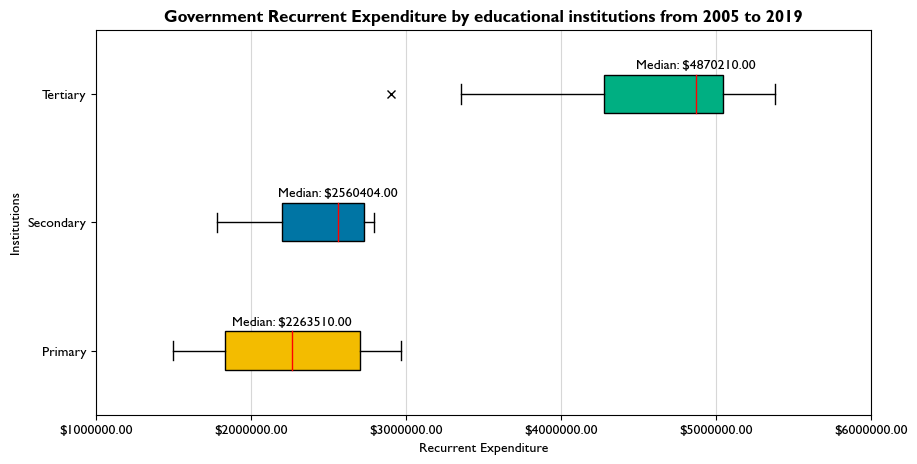

In [14]:
# Dataset 1 (Box plot)

# Creating variables for easier access later on
priSecTertiaryLabels = ["Primary","Secondary","Tertiary"]
# priSecColors = ["#F5B14C","#661D98"]
priSecTertiaryColors = ["#f3bc00","#0075a4","#00af82"]
# Extracting data for tertiary education from 2005 to 2019, not needed for primary and secondary as it was done previously
tertiary_data = np.array([data_poly['recurrent_expenditure'][-15:],data_jc['recurrent_expenditure'][-15:],data_ite['recurrent_expenditure'][-15:],data_uni['recurrent_expenditure'][-15:]]).sum(axis=0)
# Plotting and customizing of boxplot
fig,ax = plt.subplots(figsize=(10,5))
boxplot = ax.boxplot(np.array([data_primary['recurrent_expenditure'][-15:],data_secondary['recurrent_expenditure'][-15:],tertiary_data],dtype=object).T,labels = priSecTertiaryLabels, vert=False,patch_artist = True,flierprops={"marker" : "x"})
# Customizing each boxplot, adding text for median value and changing color of boxes, and changing median line color
for patch,color,median in zip(boxplot['boxes'],priSecTertiaryColors,boxplot['medians']):
    patch.set_facecolor(color)
    x,y = median.get_xydata()[1]
    ax.text(x,y+0.05,f'Median: ${x:.2f}',ha="center")
    median.set_color("red")
ax.xaxis.set_major_formatter('${x:1.2f}')
ax.set_title("Government Recurrent Expenditure by educational institutions from 2005 to 2019",fontweight='bold')
ax.set_xlabel("Recurrent Expenditure")
ax.set_ylabel("Institutions")
ax.set_xlim(1000000.00,6000000.00)
ax.grid(axis="x",alpha=0.5)
plt.show()

In [15]:
# Dataset #2 : Pupils per teacher primary dataset analysis
header = "Number of Pupils per Teacher in Primary Schools"
print(f"{header:*^55}")
print(f"There are {pupilsPerTeacherPrimaryData.shape[0]} rows and {len(pupilsPerTeacherPrimaryData[0])} columns in this dataset.\n\nThe names of the columns are:\n")
columns = pupilsPerTeacherPrimaryData.dtype.names
for i in range(len(columns)):
    print(f"- {columns[i]} {type(pupilsPerTeacherPrimaryData[0][i])} isNumeric: {str(pupilsPerTeacherPrimaryData[0][i]).isnumeric()}")
print(" \n")
for i in columns:
    print(f"{len(np.unique(pupilsPerTeacherPrimaryData[i]))} unique values in {i} column")

****Number of Pupils per Teacher in Primary Schools****
There are 41 rows and 2 columns in this dataset.

The names of the columns are:

- year <class 'numpy.int32'> isNumeric: True
- pri_students_to_teachers <class 'numpy.float64'> isNumeric: False
 

41 unique values in year column
35 unique values in pri_students_to_teachers column


In [16]:
# Dataset #3 : Pupils per teacher secondary dataset analysis
header = "Number of Pupils per Teacher in Secondary Schools"
print(f"{header:*^57}")
print(f"There are {pupilsPerTeacherSecondaryData.shape[0]} rows and {len(pupilsPerTeacherSecondaryData[0])} columns in this dataset.\n\nThe names of the columns are:\n")
columns = pupilsPerTeacherSecondaryData.dtype.names
for i in range(len(columns)):
    print(f"- {columns[i]} {type(pupilsPerTeacherSecondaryData[0][i])} isNumeric: {str(pupilsPerTeacherSecondaryData[0][i]).isnumeric()}")
print(" \n")
for i in columns:
    print(f"{len(np.unique(pupilsPerTeacherSecondaryData[i]))} unique values in {i} column")

****Number of Pupils per Teacher in Secondary Schools****
There are 41 rows and 2 columns in this dataset.

The names of the columns are:

- year <class 'numpy.int32'> isNumeric: True
- sec_students_to_teachers <class 'numpy.float64'> isNumeric: False
 

41 unique values in year column
35 unique values in sec_students_to_teachers column


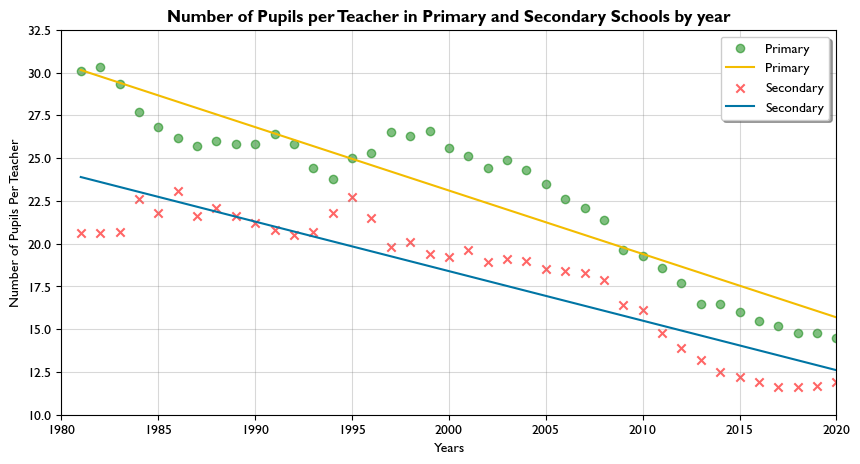

In [17]:
# Dataset 2 & 3 Code (Scatter plot)

# Extracting data for first scatterplot for primary schools
x,y = pupilsPerTeacherPrimaryData['year'][:-1],pupilsPerTeacherPrimaryData['pri_students_to_teachers'][:-1]
plt.figure(figsize=(10,5))
# Plotting and customizing of scatterplot
plt.scatter(x,y,color="green",alpha=0.5,edgecolors="green")
# Creating a regression line and plotting it
m,b = np.polyfit(x,y,deg=1)
plt.plot(x,m*x + b,"#f3bc00",linestyle="-")
# Extracting data for second scatterplot for secondary schools
x1,y1 = pupilsPerTeacherSecondaryData['year'][:-1],pupilsPerTeacherSecondaryData['sec_students_to_teachers'][:-1]
# Plotting and customizing of scatterplot

plt.scatter(x1,y1,marker="x",alpha=0.6,color="red")
# Creating a regression line and plotting it
m,b = np.polyfit(x1,y1,deg=1)
plt.plot(x1,m*x1 + b,"#0075a4",linestyle="-")
# Customizing of general chart
plt.legend(["Primary","Primary","Secondary","Secondary"],shadow=True)
plt.title("Number of Pupils per Teacher in Primary and Secondary Schools by year",fontweight='bold')
plt.xlabel("Years")
plt.ylabel("Number of Pupils Per Teacher")
plt.grid(color='grey',alpha=0.3)
plt.axis([1980,2020,10.0,32.5])
plt.show()

In [18]:
# Dataset #4 : Combined and gross enrolment dataset analysis combined-and-gross-enrolment-ratio-for-primary-secondary-tertiary-education
header = "Combined and Gross Enrolment Ratio for Primary, Secondary and Tertiary Education"
print(f"{header:*^88}")
print(f"There are {enrolmentData.shape[0]} rows and {len(enrolmentData[0])} columns in this dataset.\n\nThe names of the columns are:\n")
columns = enrolmentData.dtype.names
for i in range(len(columns)):
    print(f"- {columns[i]} {type(enrolmentData[0][i])} isNumeric: {str(enrolmentData[0][i]).isnumeric()}")
print(" \n")
for i in columns:
    print(f"{len(np.unique(enrolmentData[i]))} unique values in {i} column")

****Combined and Gross Enrolment Ratio for Primary, Secondary and Tertiary Education****
There are 372 rows and 5 columns in this dataset.

The names of the columns are:

- year <class 'numpy.int32'> isNumeric: True
- category <class 'numpy.str_'> isNumeric: False
- level_of_education <class 'numpy.str_'> isNumeric: False
- sex <class 'numpy.str_'> isNumeric: False
- gross_enrolment_ratio <class 'numpy.float64'> isNumeric: False
 

31 unique values in year column
2 unique values in category column
4 unique values in level_of_education column
3 unique values in sex column
246 unique values in gross_enrolment_ratio column


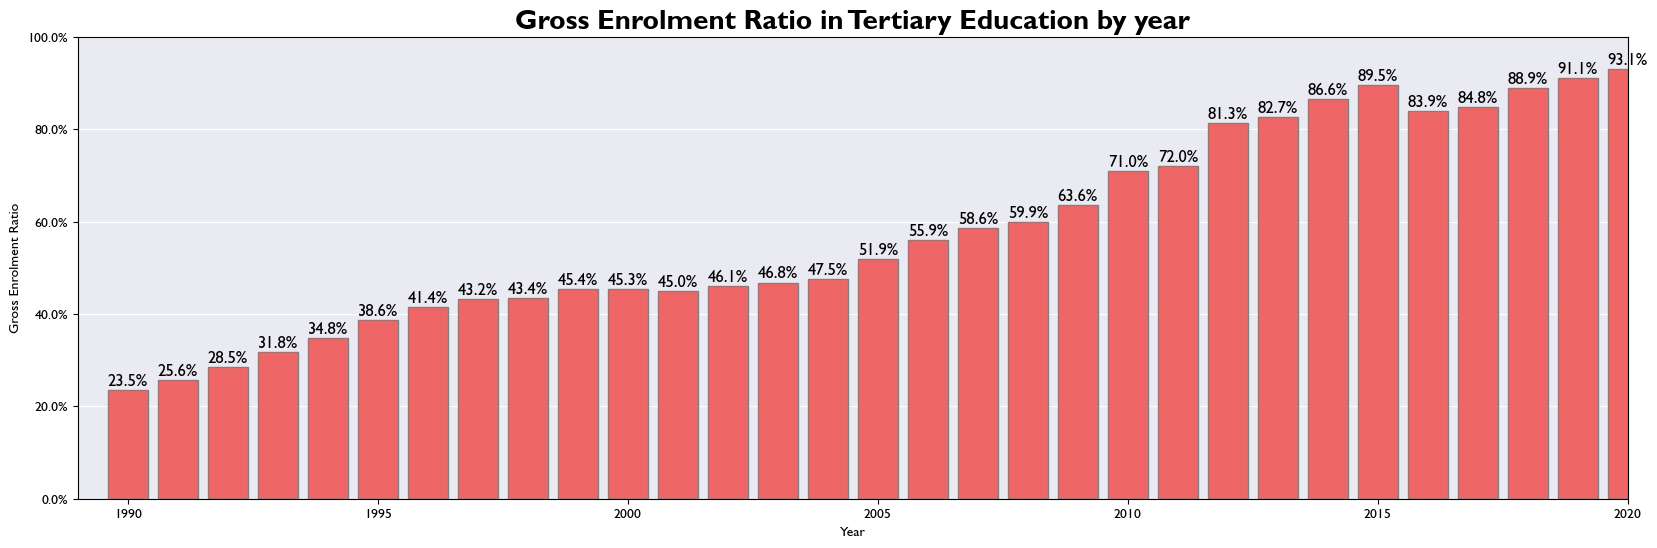

In [19]:
# Dataset 4 (Bar chart)
# Function to add label to each bar
def addlabels(x,y):
    for i in range(len(x)):
        ax.annotate(text=str(y[i])+"%",xy=(x[i],y[i]+1),ha='center',fontsize=12)
# Extracting enrolment data for tertiary education
tertiaryEnrolmentData = enrolmentData[np.isin(enrolmentData['level_of_education'],['TERTIARY EDUCATION'])][enrolmentData[np.isin(enrolmentData['level_of_education'],['TERTIARY EDUCATION'])]['sex'] == "MF"]

# Plotting bar chart with customization
plt.figure(1,figsize=(20,6))
ax = plt.axes(facecolor="#eaeaf2")
ax.bar(tertiaryEnrolmentData['year'],tertiaryEnrolmentData['gross_enrolment_ratio'],edgecolor="grey",color='#EE6666')
ax.axis([1989,2020,0,100])
addlabels(tertiaryEnrolmentData['year'],tertiaryEnrolmentData['gross_enrolment_ratio'])
ax.set_title("Gross Enrolment Ratio in Tertiary Education by year",fontweight='bold',fontsize=20)
ax.set_xlabel("Year")
ax.set_ylabel("Gross Enrolment Ratio")
ax.yaxis.set_major_formatter('{x}%')
ax.axes.grid(color="w",axis="y")
ax.axes.set_axisbelow(True)
plt.show()

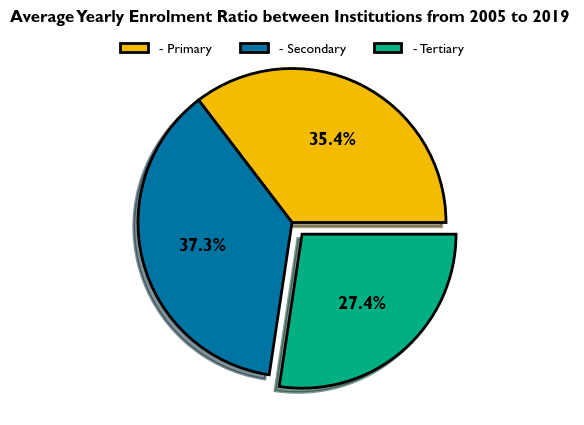

In [20]:
# Dataset 4 (Pie chart)

# Extracting enrolment data from 2005 to 2019 (15 years) for primary and secondary school
priEnrolmentData = enrolmentData[np.isin(enrolmentData['level_of_education'],['PRIMARY EDUCATION'])][enrolmentData[np.isin(enrolmentData['level_of_education'],['TERTIARY EDUCATION'])]['sex'] == "MF"][-15:]
secEnrolmentData = enrolmentData[np.isin(enrolmentData['level_of_education'],['SECONDARY EDUCATION'])][enrolmentData[np.isin(enrolmentData['level_of_education'],['TERTIARY EDUCATION'])]['sex'] == "MF"][-15:]
tertiaryEnrolmentData = enrolmentData[np.isin(enrolmentData['level_of_education'],['TERTIARY EDUCATION'])][enrolmentData[np.isin(enrolmentData['level_of_education'],['TERTIARY EDUCATION'])]['sex'] == "MF"][-15:]

# Getting average of enrolment ratio for primary and secondary school
primaryAverageEnrolment = np.average(priEnrolmentData['gross_enrolment_ratio'])
secondaryAverageEnrolment = np.average(secEnrolmentData['gross_enrolment_ratio'])
tertiaryAverageEnrolment = np.average(tertiaryEnrolmentData['gross_enrolment_ratio'])

# Plotting chart and adding customizations
plt.figure(figsize=(10,5))
plt.pie([primaryAverageEnrolment,secondaryAverageEnrolment,tertiaryAverageEnrolment],autopct="%1.1f%%",colors = priSecTertiaryColors, shadow=True,wedgeprops={"edgecolor":"black",'linewidth': 2, 'linestyle': 'solid', 'antialiased': True}, textprops = {'weight':'bold','fontsize':13}, explode=(0,0,0.1))
plt.title("Average Yearly Enrolment Ratio between Institutions from 2005 to 2019 ",fontweight='bold')
plt.legend(["- Primary","- Secondary","- Tertiary"],ncol=3,frameon=False,loc="upper center")
plt.show()